In [1]:
!pip install numpy pandas networkx

In [6]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

![SWPairHMMGlobal](figures/phmm_global.png)

In [9]:
# transition probabilities

delta = 0.2
tau = 0.1
epsilon = 0.1

In [10]:
# transition matrix

a = pd.DataFrame(
    np.array([
        # B    M                    X        Y        E
        [ 0.0, 1 - (2*delta) - tau, delta,   delta,   tau ], # B
        [ 0.0, 1 - (2*delta) - tau, delta,   delta,   tau ], # M
        [ 0.0, 1 - epsilon - tau,   epsilon, 0.0,     tau ], # X
        [ 0.0, 1 - epsilon - tau,   0.0,     epsilon, tau ], # Y
        [ 0.0, 0.0,                 0.0,     0.0,     0.0 ]  # E
    ]),
    columns = ['B', 'M', 'X', 'Y', 'E']
)
a.index = ['B', 'M', 'X', 'Y', 'E']

a

,B,M,X,Y,E
B,0.0,0.5,0.2,0.2,0.1
M,0.0,0.5,0.2,0.2,0.1
X,0.0,0.8,0.1,0.0,0.1
Y,0.0,0.8,0.0,0.1,0.1
E,0.0,0.0,0.0,0.0,0.0


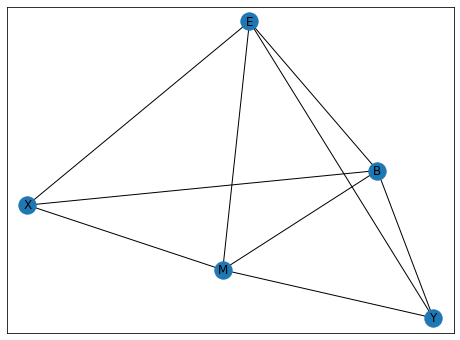

In [11]:
G = nx.Graph()

G.add_edges_from([
    ("B", "M", {'weight': 1 - (2*delta) - tau}),
    ("B", "X", {'weight': delta}),
    ("B", "Y", {'weight': delta}),
    ("B", "E", {'weight': tau})
])
G.add_edges_from([
    ("M", "M", {'weight': 1 - (2*delta) - tau}),
    ("M", "X", {'weight': delta}),
    ("M", "Y", {'weight': delta}),
    ("M", "E", {'weight': tau})
])
G.add_edges_from([
    ("X", "M", {'weight': 1 - epsilon - tau}),
    ("X", "X", {'weight': epsilon}),
    ("X", "E", {'weight': tau})
])
G.add_edges_from([
    ("Y", "M", {'weight': 1 - epsilon - tau}),
    ("Y", "Y", {'weight': epsilon}),
    ("Y", "E", {'weight': tau})
])

fig, ax = plt.subplots(1, 1, figsize=(8, 6));
nx.draw_networkx(G, ax=ax)

In [5]:
# emissions (match state)

eM = pd.DataFrame(
    np.array([
        # A     C     G     T
        [ 0.50, 0.05, 0.15, 0.30 ], # A
        [ 0.05, 0.50, 0.30, 0.15 ], # C
        [ 0.15, 0.30, 0.50, 0.05 ], # G
        [ 0.30, 0.15, 0.05, 0.50 ]  # T
    ]),
    columns = ['A', 'C', 'G', 'T']
)
eM.index = ['A', 'C', 'G', 'T']

eM

,A,C,G,T
A,0.50,0.05,0.15,0.30
C,0.05,0.50,0.30,0.15
G,0.15,0.30,0.50,0.05
T,0.30,0.15,0.05,0.50


In [6]:
# emissions (insert / delete states)

eXY = {
    'A': 0.25,
    'C': 0.25,
    'G': 0.25,
    'T': 0.25
}

eXY

{'A': 0.25, 'C': 0.25, 'G': 0.25, 'T': 0.25}

Initialization:

\begin{equation*}
\begin{aligned}[c]
v(0) & = 0~\forall~k > 0
\end{aligned}
\qquad\Longleftrightarrow\qquad
\begin{aligned}[c]
v^M(0,0)=1\\
v^{*}(i,0)=v^{*}(0,j)=0
\end{aligned}
\end{equation*}

Recurrence ($i = 1 ... L$):

\begin{equation*}
\begin{aligned}[c]
v_l(i) & = e_l(x_i) \text{max}_k(a_{kl}v_k(i-1)) \\
\text{ptr}_i(l) & = \text{argmax}_k(a_{kl}v_k(i-1))
\end{aligned}
\qquad\Longleftrightarrow\qquad
\begin{aligned}[c]
v^M(i,j)&=p_{{x_i}{y_j}}\text{max}
\begin{cases} 
      (1-2\delta-\tau)v^M(i-1,j-1) \\
      (1-\epsilon-\tau)v^X(i-1,j-1) \\
      (1-\epsilon-\tau)v^Y(i-1,j-1) \\
\end{cases}\\
v^X(i,j)&=q_{{x_i}}\text{max}
\begin{cases} 
      \delta v^M(i-1,j) \\
      \epsilon v^X(i-1,j) \\
\end{cases}\\
v^Y(i,j)&=q_{{y_i}}\text{max}
\begin{cases} 
      \delta v^M(i,j-1) \\
      \epsilon v^Y(i,j-1) \\
\end{cases}\\
\end{aligned}
\end{equation*}

Termination:

\begin{equation*}
\begin{aligned}[c]
{\textbf{P}}(x, \pi^*) & = \text{max}_k(a_{k0}v_k(L)) \\
\pi^*_L & = \text{argmax}_k(a_{k0}v_k(L))
\end{aligned}
\qquad\Longleftrightarrow\qquad
\begin{aligned}[c]
v^E = \tau \text{max}(v^M(n,m),v^X(n,m),v^Y(n,m))
\end{aligned}
\end{equation*}

Traceback ($i = 1 ... L$):

\begin{equation*}
\begin{aligned}[c]
\pi^*_{i-1} = \text{ptr}_i(\pi^*_i)
\end{aligned}
\qquad\Longleftrightarrow\qquad
\begin{aligned}[c]
\end{aligned}
\end{equation*}

![max_VM](figures/viterbi1.png)

In [ ]:
def max_state(S1, S2, i, j, )

In [7]:
def max_vM(S1, S2, i, j, v_M, v_X, v_Y, tb):
    p = eM.loc[S1[i - 1], S2[j - 1]]

    r = np.array([
        a.loc['M', 'M']*v_M[i - 1][j - 1],
        a.loc['X', 'M']*v_X[i - 1][j - 1],
        a.loc['Y', 'M']*v_Y[i - 1][j - 1]
    ])
    
    mr = np.max(r)
    mi = np.argmax(r)

    v_M[i][j] = p*mr
    tb[i][j] = mi

![max_VM](figures/viterbi2.png)

In [8]:
def max_vX(S1, S2, i, j, v_M, v_X, v_Y, tb):
    q = eXY[S1[i]]
    
    r = np.array([
        a.loc['M', 'X']*v_M[i - 1][j],
        a.loc['X', 'X']*v_X[i - 1][j],
        0
    ])
    
    mr = np.max(r)
    mi = np.argmax(r)
    
    v_X[i][j] = q*mr
    tb[i][j] = mi

![max_VM](figures/viterbi3.png)

In [9]:
def max_vY(S1, S2, i, j, v_M, v_X, v_Y, tb):
    q = eXY[S2[0]]
    
    r = np.array([
        a.loc['M', 'Y']*v_M[i][j - 1],
        0,
        a.loc['Y', 'Y']*v_Y[i][j - 1]
    ])
    
    mr = np.max(r)
    mi = np.argmax(r)
    
    v_Y[i][j] = q*mr
    tb[i][j] = mi
    

In [10]:
def traceback(S1, S2, v_M, v_X, v_Y, tb_M, tb_X, tb_Y):
    i = len(S1)
    j = len(S2)
    n = np.max([len(S1), len(S2)]) - 1
    
    r = np.array([ v_M[i][j], v_X[i][j], v_Y[i][j] ])
    
    mr = np.max(r)
    mi = np.argmax(r)
    
    a1 = (n+1)*[' ']
    a2 = (n+1)*[' ']
            
    while i > 0 and j > 0:        
        if mi == 0:
            a1[n] = S1[i - 1]
            a2[n] = S2[j - 1]
            mi = tb_M[i][j]
            i -= 1
            j -= 1            
        elif mi == 1:
            a1[n] = S1[i - 1]
            a2[n] = '-'        
            mi = tb_X[i][j]
            i -= 1
        elif mi == 2:
            a1[n] = '-'
            a2[n] = S2[j - 1]
            mi = tb_Y[i][j]
            j -= 1
            
        n -= 1
        
    return ''.join(a1), ''.join(a2)

In [11]:
# Initialization

## Specify sequences

A = "TTACG"
B = "TAG"

## Viterbi matrices

vM = np.zeros([len(A)+1, len(B)+1])
vX = np.zeros([len(A)+1, len(B)+1])
vY = np.zeros([len(A)+1, len(B)+1])

vM[0,0] = 1

## Traceback matrices

tM = np.zeros([len(A)+1, len(B)+1])
tX = np.zeros([len(A)+1, len(B)+1])
tY = np.zeros([len(A)+1, len(B)+1])

In [12]:
# Populate Viterbi matrices

for i in range(1, len(A)+1):
    for j in range(1, len(B)+1):
        max_vM(A, B, i, j, vM, vX, vY, tM)
        max_vX(A, B, i, j, vM, vX, vY, tX)
        max_vY(A, B, i, j, vM, vX, vY, tY)

In [13]:
# Follow traceback matrices

a1, a2 = traceback(A, B, vM, vX, vY, tM, tX, tY)

In [14]:
# Print original sequences

print(A)
print(B)

TTACG
TAG


In [15]:
# Print alignment

print(a1)
print(a2)

TTACG
T-A-G


In [16]:
np.set_printoptions(linewidth=200)

print("vM:")
print(np.transpose(vM))

print("vX:")
print(np.transpose(vX))

print("vY:")
print(np.transpose(vY))

vM:
[[1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 2.5000e-01 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 3.7500e-02 5.0000e-03 1.2500e-05 9.3750e-07]
 [0.0000e+00 0.0000e+00 5.0000e-04 2.8125e-03 7.5000e-04 1.0000e-04]]
vX:
[[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]
 [0.000000e+00 0.000000e+00 1.250000e-02 3.125000e-04 7.812500e-06 1.953125e-07]
 [0.000000e+00 0.000000e+00 0.000000e+00 1.875000e-03 2.500000e-04 6.250000e-06]
 [0.000000e+00 0.000000e+00 0.000000e+00 2.500000e-05 1.406250e-04 3.750000e-05]]
vY:
[[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 1.2500e-02 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 3.1250e-04 1.8750e-03 2.5000e-04 6.2500e-07 4.6875e-08]]


In [17]:
print("tM:")
print(np.transpose(tM))

print("tX:")
print(np.transpose(tX))

print("tY:")
print(np.transpose(tY))

tM:
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1.]
 [0. 0. 2. 0. 0. 1.]]
tX:
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0.]]
tY:
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0.]]
